In [1]:
%load_ext autoreload
%autoreload 2

from geographiclib.geodesic import Geodesic
import math
from q_learning_agent import QTableAgent
from aircraft_env import Location
# from  geopy.geocoders import Nominatim
from aircraft_env import AircraftEnv
from utils.geodesic import Location
from utils.env_extra import env_summary
import pandas as pd
import numpy as np
geod = Geodesic.WGS84  # define the WGS84 ellipsoid

In [2]:
loc_1 = Location(45.46873715, -73.74257166095532)
loc_2 = Location(49.0068908, 2.5710819691019156)
loc_1, loc_2
env = AircraftEnv(arrival_location=loc_1, destination=loc_2, n_waypoints=9)

In [3]:
df = env_summary(env)  
df

,trajectory,waypoint,speed,tas,distance,wind_magnitude,wind_direction,course,correction_angle,altitude,time_for_distance,fuel_burn,total_time,reward,fuel_flow
0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
1,4,1,237.489617,233.581269,699944.938225,3.930965,71.027558,64.929535,-0.102431,10000.0,2947.265424,1222.967557,2947.265424,-1222.967557,0.4149499216749102
2,4,2,227.075231,234.466093,692560.313824,13.059055,299.855661,62.976893,2.673654,10609.6,3049.915704,1223.103124,5997.181128,-1223.103124,0.4010285012751503
3,1,3,225.191174,225.562317,708591.109880,42.473547,332.308323,57.400089,10.813352,10609.6,3146.620263,1188.932726,9143.801391,-1188.932726,0.3778443621121942
4,2,4,223.038801,224.597374,694499.895107,38.774459,168.151850,80.822045,-9.930438,10000.0,3113.807515,1214.245840,12257.608906,-1214.245840,0.38995533103321206
5,1,5,191.418442,224.597374,694480.749401,44.530055,214.909090,81.013311,-8.214014,10000.0,3628.076488,1414.787768,15885.685394,-1414.787768,0.38995533103321206
6,3,6,218.340904,237.434018,699818.543405,19.104725,279.880104,101.963309,-0.167585,10609.6,3205.164639,1311.064745,19090.850033,-1311.064745,0.4090475505448553
7,2,7,226.646459,230.586637,694497.671182,4.372281,251.917912,97.843864,-0.474997,10000.0,3064.233495,1245.509070,22155.083528,-1245.509070,0.4064667630405116
8,3,8,244.969364,227.592005,692678.387980,18.291803,127.339210,109.825991,-1.385875,10000.0,2827.612306,1125.769870,24982.695834,-1125.769870,0.39813444977334306


In [29]:
from utils.units_converter import meter2feet, mperstokt

meter2feet(df[df['waypoint'] == 8]['altitude'])

8    32808.39895
Name: altitude, dtype: float64

In [76]:
from openap import FuelFlow, aero

fuelflow = FuelFlow(ac='A320', eng='CFM56-5B4')
FF = fuelflow.enroute(mass=30000, tas=230, alt=32000, path_angle=0)

In [77]:
env.aicraft.wrap.descent_const_vcas()['default'] / aero.kts

279.9138487376663

In [109]:
from openap.traj import Generator

trajgen = Generator(ac='a320')
data_de = trajgen.descent(dt=10, cas_const_de=279, mach_const_de=0.75, alt_cr=35000)

In [114]:
for i in range(1, len(data_de['h'])):
    dh = data_de['h'][i - 1] - data_de['h'][i] 
    s = data_de['s'][i]
    if s == 0:
        print(0)
    else:
        print(np.rad2deg(np.arcsin(dh / s)))

0.0
0.0
0.0
0.0
0.0
0.0
0.21198749380577336
0.18546913166216827
0.16483203951584974
0.14831501459003676
0.13479624306929502
0.12352728765856537
0.1139896801775341
0.10581289543554784
0.09872509615845834
0.09252232776705406
0.08704857405908686
0.08218245433833574
0.07782811746300776
0.07390886521586715
0.07036259600342207
0.0671384901634134
0.06419455929620697
0.06149580780257332
0.05901283533379927
0.05672076152936634
0.05459838954201932
0.052627548691865575
0.05079257303838104
0.08546536774609713
0.08269294719432668
0.08010777531273472
0.0776915218285584
0.0754281731684847
0.07330367767129446
0.07130565406291633
0.06942315041327601
0.06764644366241855
0.0659668719671504
0.06437669376596865
0.0628689687231499
0.06143745668925799
0.060076531575553205
0.05878110763570103
0.057546576118378386
0.05636875062759567
0.055243819825556865
0.05416830635212686
0.05313903102806414
0.05215308156579574
0.051207785139155755
0.05030068426801435
0.04942951555966072
0.04859219091976425
0.047786780904569

In [18]:
meter2feet(data_de['h'])

array([32800.0, 32800.0, 30910.23622047244, 27619.553805774278,
       24328.871391076114, 21038.188976377955, 17747.50656167979,
       15752.755905511813, 13758.005249343832, 11763.254593175854,
       9768.503937007876, 7773.753280839896, 5779.002624671917,
       3784.2519685039383, 1789.5013123359595], dtype=object)

In [111]:
data_de

{'t': array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140,
        150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,
        280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400,
        410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530,
        540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660,
        670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790,
        800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920,
        930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040,
        1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150,
        1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260,
        1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370,
        1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480,
        1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590,
        1600, 1610, 1620, 1630, 1640, 1650

In [107]:
FFs = []
for i in range(len(data_de['h'])):
    FF = fuelflow.enroute(mass=60000, tas=mperstokt(data_de['v'][i]), alt=meter2feet(data_de['h'])[i])
    FFs.append(FF*100)

In [118]:
env._wind_magnitude.shape

(33, 5, 9)

In [128]:
33*5*9

1485

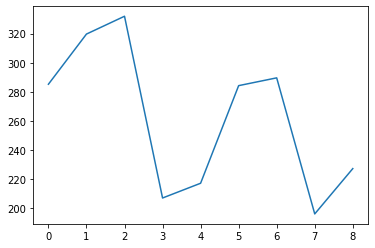

In [122]:
plt.plot(env._wind_direction[10, 0, :])

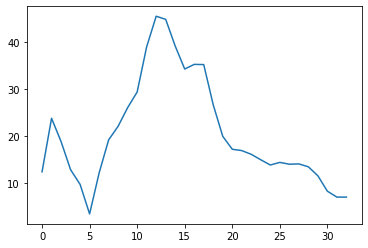

In [127]:
plt.plot(env._wind_magnitude[:, 0, 4] / 5)

In [56]:
np.sin(10)

-0.5440211108893698

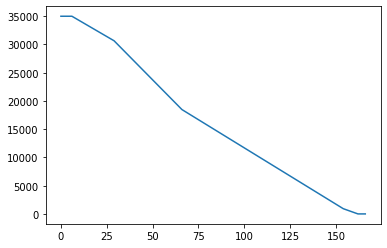

In [110]:
plt.plot(meter2feet(data_de['h']))

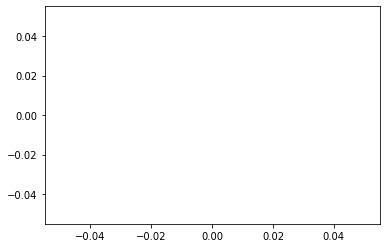

In [106]:
import matplotlib.pyplot as plt
plt.plot(FFs)

In [104]:
sum(FFs)

nan